In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [13]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [14]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [15]:
df.sample(2)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
348,AsstProf,B,4,3,Male,80139
109,Prof,A,40,31,Male,131205


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [17]:
df['sex'] = df['sex'].replace ({'Male':1,'Female':2}) #encoding string value to numeric values

In [18]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,1,139750
1,Prof,B,20,16,1,173200
2,AsstProf,B,4,3,1,79750
3,Prof,B,45,39,1,115000
4,Prof,B,40,41,1,141500


In [19]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [20]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [21]:
df['discipline'] = df['discipline'].replace ({'B':2,'A':1}) #encoding string value to numeric values

In [22]:
df['discipline'].value_counts()

2    216
1    181
Name: discipline, dtype: int64

In [23]:
df['rank'] = df['rank'].replace ({'Prof':3,'AsstProf':2,'AssocProf':1}) #encoding string value to numeric values

In [24]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,3,2,19,18,1,139750
1,3,2,20,16,1,173200
2,2,2,4,3,1,79750
3,3,2,45,39,1,115000
4,3,2,40,41,1,141500


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int64
 1   discipline     397 non-null    int64
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int64
 5   salary         397 non-null    int64
dtypes: int64(6)
memory usage: 18.7 KB


In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rank,397.00,2.51,0.76,1.00,2.00,3.00,3.00,3.00
discipline,397.00,1.54,0.50,1.00,1.00,2.00,2.00,2.00
yrs.since.phd,397.00,22.31,12.89,1.00,12.00,21.00,32.00,56.00
yrs.service,397.00,17.61,13.01,0.00,7.00,16.00,27.00,60.00
sex,397.00,1.10,0.30,1.00,1.00,1.00,1.00,2.00
salary,397.00,113706.46,30289.04,57800.00,91000.00,107300.00,134185.00,231545.00


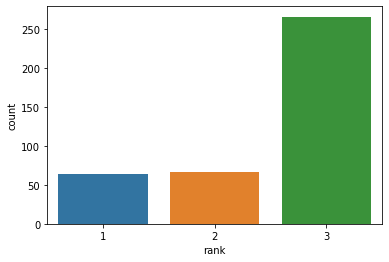

In [27]:
sns.countplot (x='rank', data = df)
plt.show()

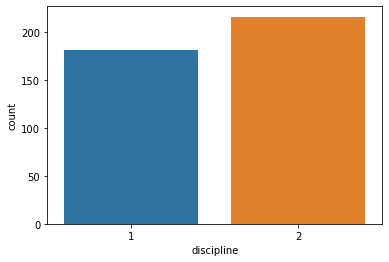

In [28]:
sns.countplot (x='discipline', data = df)
plt.show()

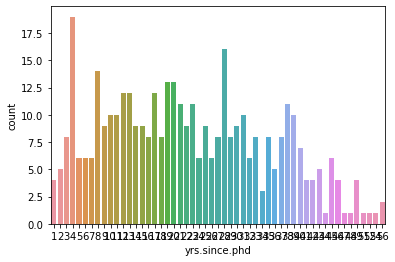

In [29]:
sns.countplot (x='yrs.since.phd', data = df)
plt.show()

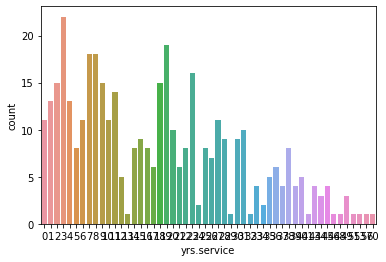

In [30]:
sns.countplot (x='yrs.service', data = df)
plt.show()

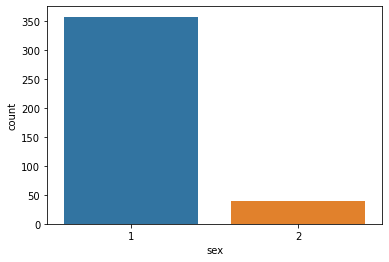

In [31]:
sns.countplot (x='sex', data = df)
plt.show()

NOTES : 
    1. Imbalance present in ranks and sex columns

In [32]:
#Checking for relationships

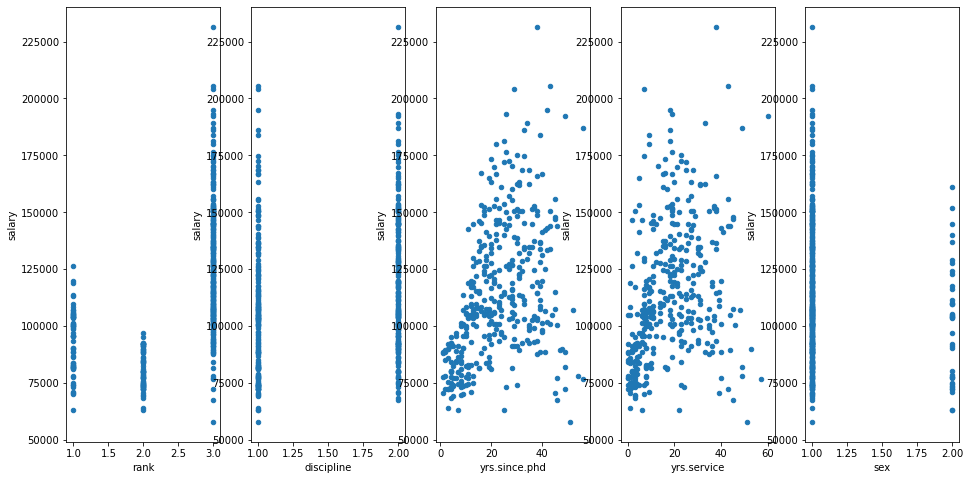

In [33]:
fig, axs = plt.subplots(1,5) #1 row and 3 columns
df.plot(kind='scatter', x ='rank', y='salary', ax=axs[0], figsize = (16,8))
df.plot(kind='scatter', x ='discipline', y='salary', ax=axs[1])
df.plot(kind='scatter', x ='yrs.since.phd', y='salary', ax=axs[2])
df.plot(kind='scatter', x ='yrs.service', y='salary', ax=axs[3])
df.plot(kind='scatter', x ='sex', y='salary', ax=axs[4])
fig.savefig('test_name.png')

In [34]:
df.corr().sort_values('salary')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
sex,-0.13,-0.00,-0.15,-0.15,1.00,-0.14
discipline,-0.09,1.00,-0.22,-0.16,-0.00,0.16
yrs.service,0.45,-0.16,0.91,1.00,-0.15,0.33
yrs.since.phd,0.53,-0.22,1.00,0.91,-0.15,0.42
rank,1.00,-0.09,0.53,0.45,-0.13,0.52
salary,0.52,0.16,0.42,0.33,-0.14,1.00


<AxesSubplot:>

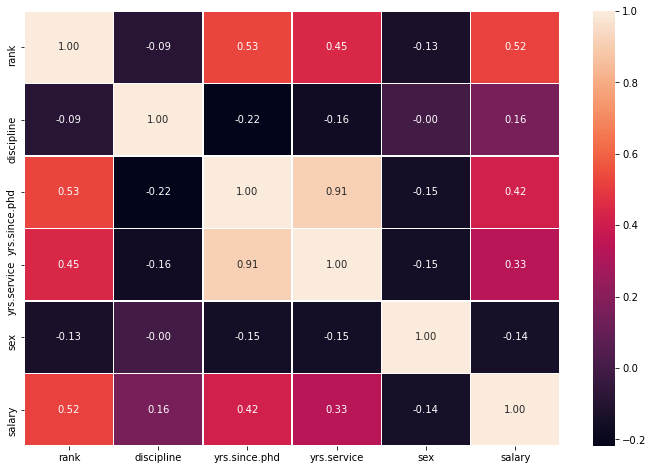

In [35]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, linecolor  = "white", fmt='.2f',cbar=True) #upto 2 places of decimals

In [36]:
import warnings
warnings.filterwarnings ('ignore')

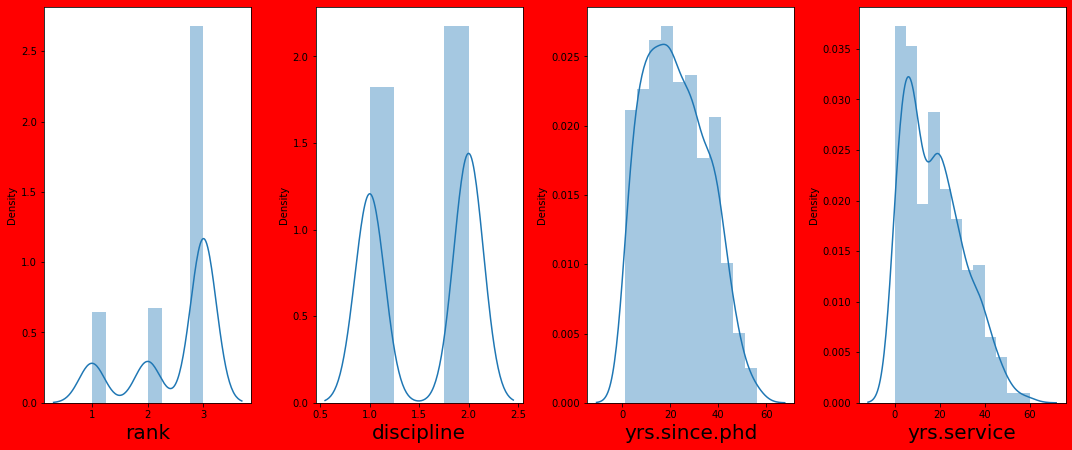

In [37]:
#checking the ditribution
plt.figure(figsize = (15,12), facecolor = 'red')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <5: #here 5 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (df[column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

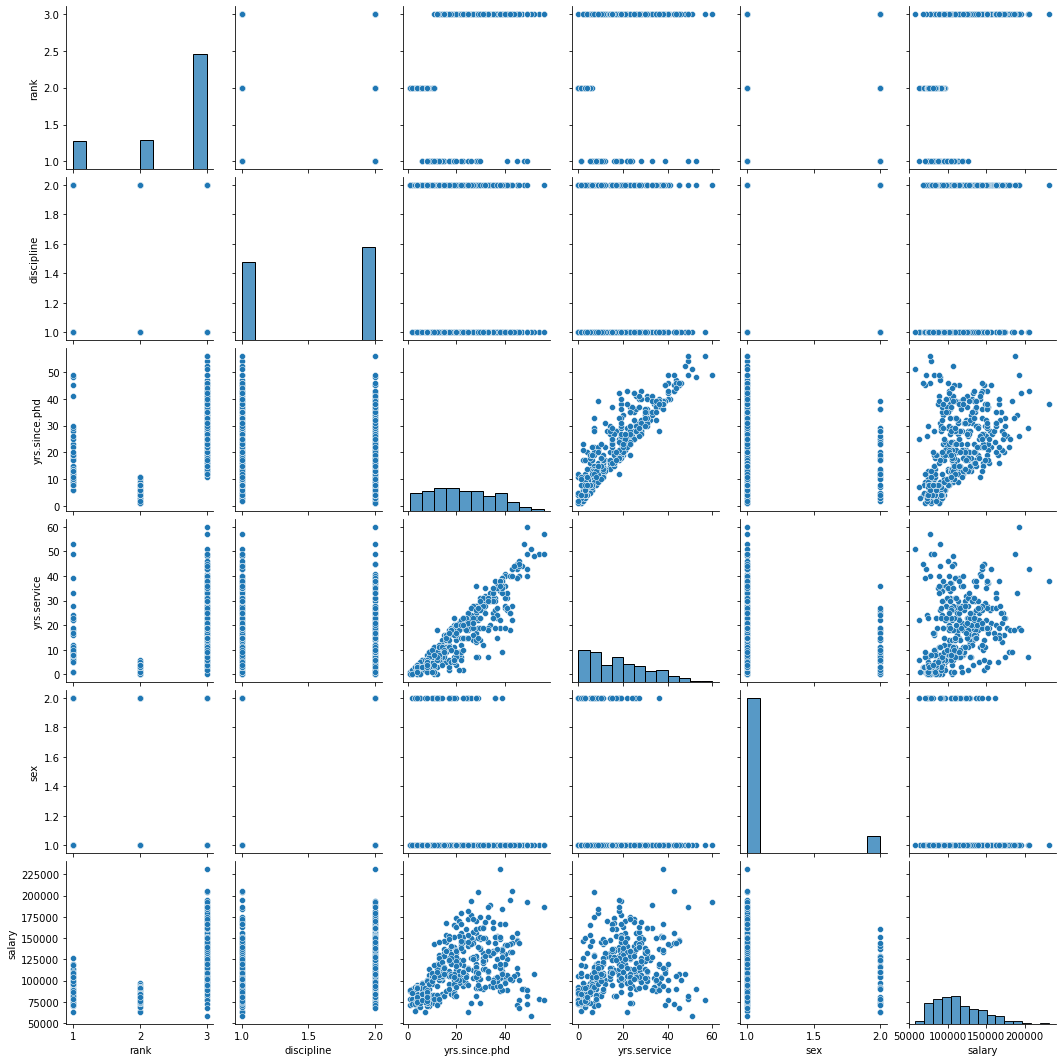

In [38]:
#using pairplot
sns.pairplot(df)
plt.savefig ('pairplot.png')
plt.show()


In [39]:
df1 = df

In [40]:
df1

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,3,2,19,18,1,139750
1,3,2,20,16,1,173200
2,2,2,4,3,1,79750
3,3,2,45,39,1,115000
4,3,2,40,41,1,141500
...,...,...,...,...,...,...
392,3,1,33,30,1,103106
393,3,1,31,19,1,150564
394,3,1,42,25,1,101738
395,3,1,25,15,1,95329


In [41]:
df1 = df1.drop (columns = ['discipline'])
df1 = df1.drop (columns = ['sex'])

In [42]:
df1

,rank,yrs.since.phd,yrs.service,salary
0,3,19,18,139750
1,3,20,16,173200
2,2,4,3,79750
3,3,45,39,115000
4,3,40,41,141500
...,...,...,...,...
392,3,33,30,103106
393,3,31,19,150564
394,3,42,25,101738
395,3,25,15,95329


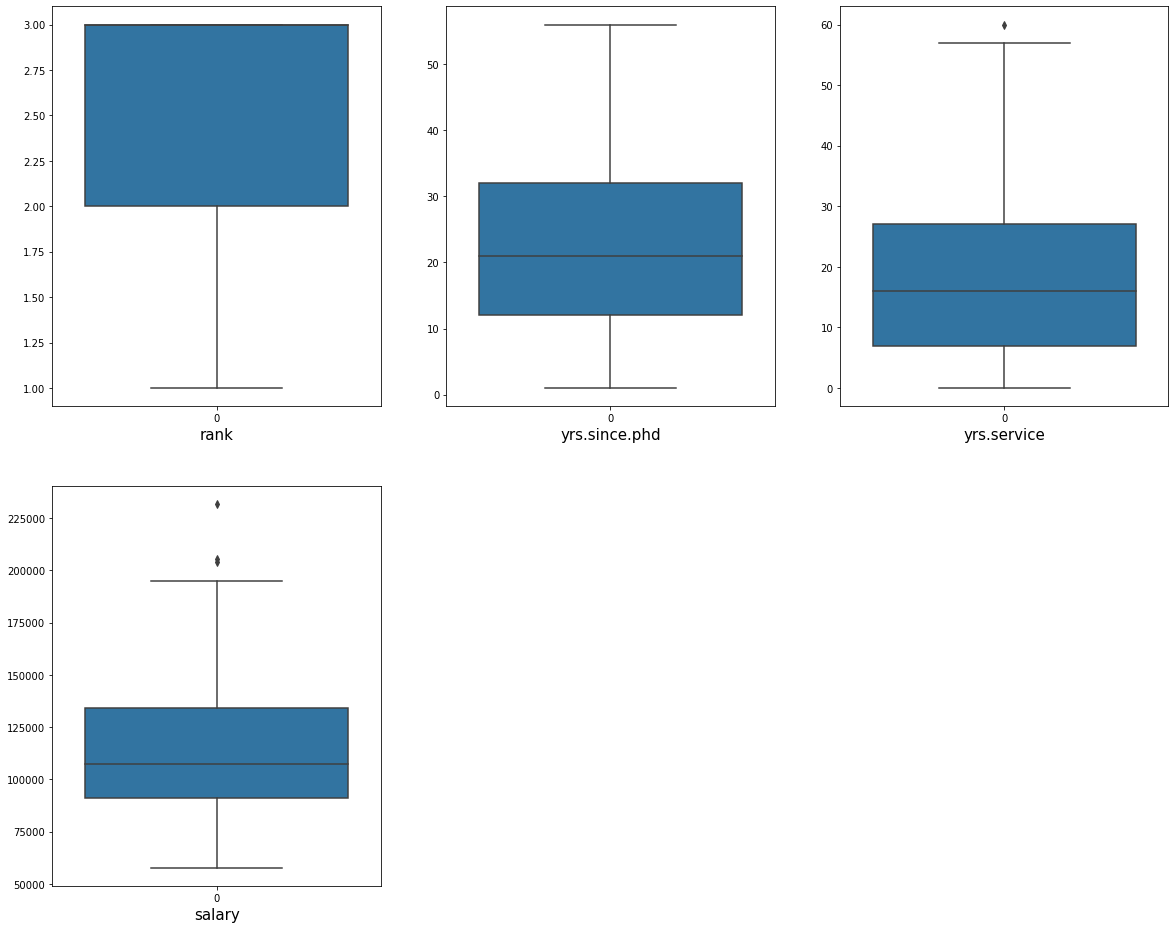

In [43]:
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df1:
    if graph <=6: #here 8 is the number of features
        plt.subplot (3,3, graph)
        ax = sns.boxplot (data = df1[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

In [44]:
#NOTES: Outliers present in higher end of yrs.service

In [45]:
df1.rename(columns = {'yrs.since.phd':'yrs_since_phd', 'yrs.service':'yrs_service'}, inplace = True)

In [46]:
df1.head()

,rank,yrs_since_phd,yrs_service,salary
0,3,19,18,139750
1,3,20,16,173200
2,2,4,3,79750
3,3,45,39,115000
4,3,40,41,141500


In [47]:
#removing outliers
q1 =df1.quantile (0.25) #first quantile
q3 =df1.quantile (0.75) #third quantile
iqr=q3-q1
var_high = (q3.yrs_service + (1.5 * iqr.yrs_service)) #for outliers on the higher end of data
var_high

57.0

In [48]:
index_high = np.where (df1['yrs_service']>var_high)

In [49]:
df1 = df1.drop(df.index[index_high])
df1.shape
df1.reset_index() #to reset the dropped index
df1.shape


(396, 4)

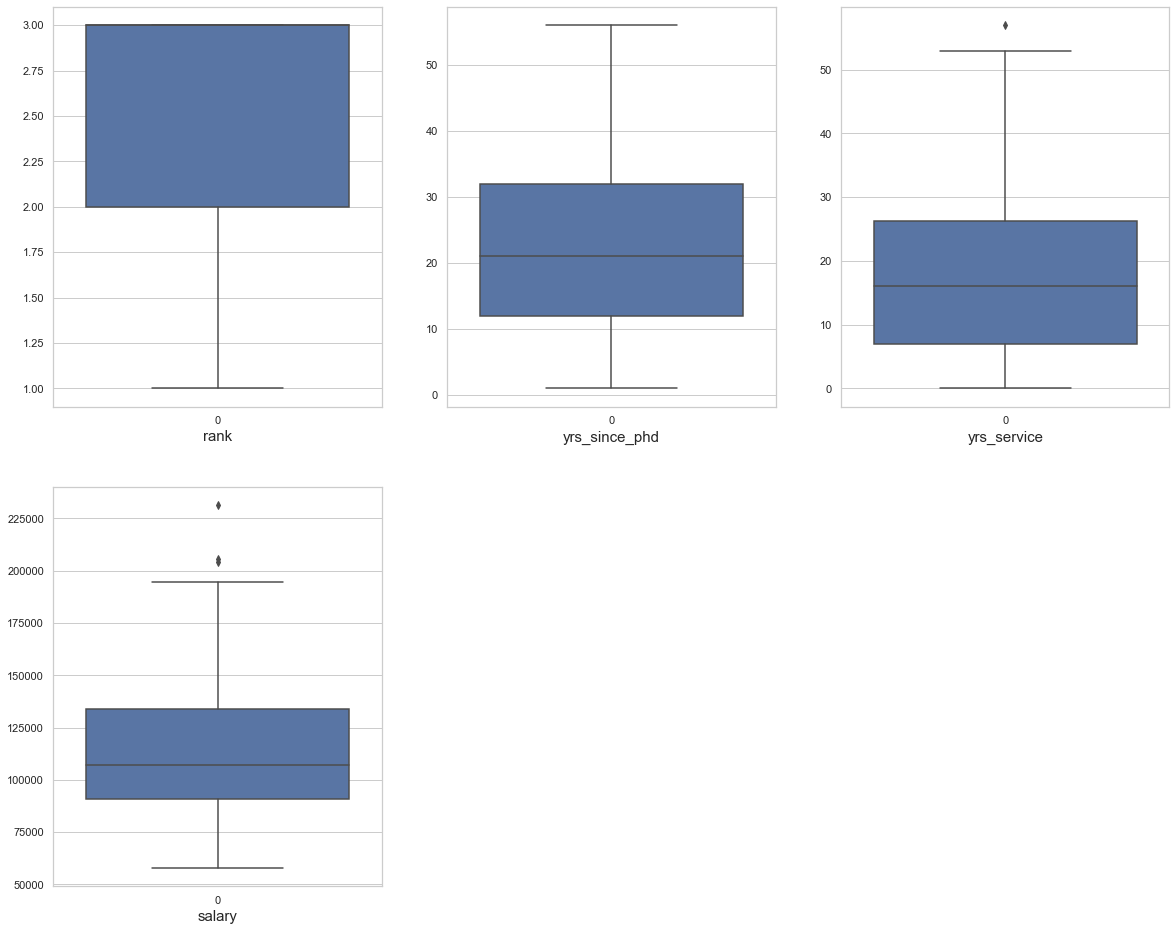

In [73]:
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df1:
    if graph <=6: #here 8 is the number of features
        plt.subplot (3,3, graph)
        ax = sns.boxplot (data = df1[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

In [51]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rank,396.00,2.51,0.76,1.00,2.00,3.00,3.00,3.00
yrs_since_phd,396.00,22.25,12.83,1.00,12.00,21.00,32.00,56.00
yrs_service,396.00,17.51,12.85,0.00,7.00,16.00,26.25,57.00
salary,396.00,113508.11,30068.09,57800.00,91000.00,107250.00,134046.25,231545.00


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 396
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           396 non-null    int64
 1   yrs_since_phd  396 non-null    int64
 2   yrs_service    396 non-null    int64
 3   salary         396 non-null    int64
dtypes: int64(4)
memory usage: 35.5 KB


In [53]:
#separating features and labels
x = df1.drop(columns = ['salary'])
y = df1['salary']

In [54]:
#Standardization of features (standard scaler)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.65042291, -0.25337508,  0.03838073],
       [ 0.65042291, -0.17535289, -0.11750409],
       [-0.67043593, -1.42370785, -1.13075543],
       ...,
       [ 0.65042291,  1.54113518,  0.58397761],
       [ 0.65042291,  0.21475803, -0.1954465 ],
       [-0.67043593, -1.11161911, -1.05281302]])

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_scaled,y,test_size = 0.25, random_state = 348)
y_test.head()

275     93000
282     57800
281    103600
23     113068
88     172272
Name: salary, dtype: int64

In [56]:
#Model Training
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [57]:
#Accuracy of the model

In [58]:
reg.score(x_train, y_train) #training score

0.2986666020857056

In [59]:
reg.score(x_test, y_test) #testing score

0.3321731540977363

In [60]:
y_pred = reg.predict(x_test)

In [61]:
y_pred

array([119529.44159448, 129928.0882534 , 129902.50956507, 123128.82868314,
       121105.67695948, 125890.81852518,  99592.33217157, 121711.34354216,
        84259.79102707, 102972.77794045,  96817.55298537, 140031.05752755,
        99253.00866027,  92222.9820111 , 120560.20147256,  96817.55298537,
       101482.31235955, 123068.63758738, 133622.27884526,  97290.04803236,
       120074.9170814 , 128691.1763997 , 130907.69075482, 118863.58391603,
       122802.294516  , 130362.2152679 , 130447.98505199, 123407.96109868,
       118730.41238034, 130727.11746753, 123893.24548984, 128811.55859123,
        81957.50688787, 100197.99875425, 122510.37275629,  85883.42814367,
        97290.04803236,  82430.00193486, 125370.92172658, 121226.059151  ,
       124486.12272836,  96138.90596276, 100537.32226556, 121492.40222238,
       132084.41151275,  86501.88407052, 128837.13727956, 134906.59245055,
       121299.03959093,  88185.71228288, 127321.09301032, 138214.05777951,
       124765.2551439 , 1

In [62]:
from sklearn.metrics import r2_score
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)*100

33.217315409773626


# We got accuracy score of 33.21%

Trying out lazypredict

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
!pip install pathlib

In [68]:
import lazypredict

In [69]:
from lazypredict.Supervised import LazyRegressor

In [70]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)

models_train,predictions_train = reg.fit(x_train, x_train, y_train, y_train)

models_test,predictions_test = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████| 42/42 [00:00<?, ?it/s]

tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to ex

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'DecisionTreeRegressor'),
  Text(1, 0, 'ExtraTreeRegressor'),
  Text(2, 0, 'ExtraTreesRegressor'),
  Text(3, 0, 'XGBRegressor'),
  Text(4, 0, 'RandomForestRegressor'),
  Text(5, 0, 'BaggingRegressor'),
  Text(6, 0, 'GradientBoostingRegressor'),
  Text(7, 0, 'GaussianProcessRegressor'),
  Text(8, 0, 'HistGradientBoostingRegressor'),
  Text(9, 0, 'LGBMRegressor'),
  Text(10, 0, 'KNeighborsRegressor'),
  Text(11, 0, 'AdaBoostRegressor'),
  Text(12, 0, 'PoissonRegressor'),
  Text(13, 0, 'TransformedTargetRegressor'),
  Text(14, 0, 'LinearRegression'),
  Text(15, 0, 'LassoLarsIC'),
  Text(16, 0, 'Lars'),
  Text(17, 0, 'Lasso'),
  Text(18, 0, 'LassoLars'),
  Text(19, 0, 'Ridge'),
  Text(20, 0, 'BayesianRidge'),
  Text(21, 0, 'RidgeCV'),
  Text(22, 0, 'SGDRegressor'),
  Text(23, 0, 'Orthog

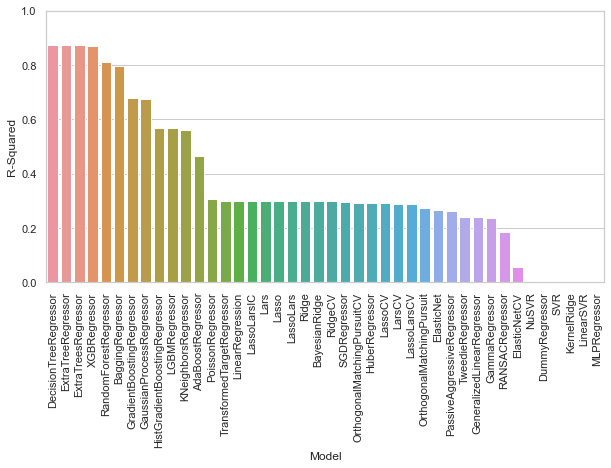

In [71]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="R-Squared", data=models_train)
ax.set(ylim=(0, 1))
plt.xticks(rotation=90)

In [72]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.87,0.87,10716.23,0.01
ExtraTreeRegressor,0.87,0.87,10716.23,0.01
ExtraTreesRegressor,0.87,0.87,10716.23,0.10
XGBRegressor,0.87,0.87,10796.56,0.05
RandomForestRegressor,0.81,0.81,13025.36,0.13
BaggingRegressor,0.79,0.80,13556.95,0.02
GradientBoostingRegressor,0.67,0.68,17019.82,0.03
GaussianProcessRegressor,0.67,0.67,17119.11,0.02
HistGradientBoostingRegressor,0.57,0.57,19654.56,0.14


# Thank You